<a href="https://colab.research.google.com/github/sechiyo97/studyDeeplearning/blob/master/deeplearning_ch3_0528.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

계단 함수

In [0]:
import numpy as np
import matplotlib.pylab as plt
sys.path.insert(1, '/content/drive/My Drive/Colab Notebooks/DeepLearning/03/')

In [0]:
# only integer and floating point
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

In [0]:
# also numpy array
def step_function(x):
  return np.array(x>0, dtype=np.int)

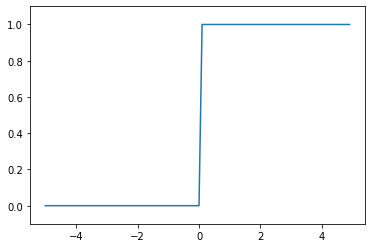

In [34]:
x = np.arange(-5.0,5.0,0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y축 범위 지정
plt.show()

시그모이드 함수

In [0]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

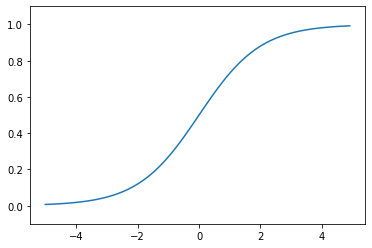

In [36]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1) # y축 범위 지정
plt.show()

ReLU (Rectified Linear Unit) 함수

In [0]:
def relu(x):
  return np.maximum(0,x)

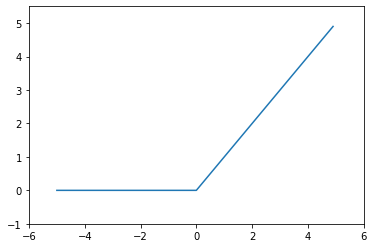

In [38]:
x = np.arange(-5.0,5.0,0.1)
y = relu(x)
plt.plot(x,y)
plt.xlim(-6,6) # x축 범위 지정
plt.ylim(-1,5.5) # y축 범위 지정
plt.show()

3층 신경망

In [0]:
# 활성화 함수
def identity_function(x):
  return x

In [40]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1,0.3,0.5], [0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

#print(W1.shape) # (2,3)
#print(X.shape) # (2,)
#print(B1.shape) # (3,)

A1 = np.dot(X,W1)+B1

Z1 = sigmoid(A1)

print(A1) # [0..3, 0.7, 1.1]
print(Z1) # [0.57444252, 0.66818777, 0.75026011]

W2 = np.array([[0.1, 0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

#print(Z1.shape) #(3,)
#print(W2.shape) #(3, 2)
#print(B2.shape) #(2,)

A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

A3 = np.dot(Z2,W3) + B3
Y = identity_function(A3) # 혹은 Y = A3

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


3층 신경망 - 코드정리

In [41]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['b1'] = np.array([0.1,0.2,0.3])
  network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['b2'] = np.array([0.1,0.2])
  network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
  network['b3'] = np.array([0.1,0.2])

  return network

def forward(network, x):
  W1,W2,W3 = network['W1'], network['W2'], network['W3']
  b1,b2,b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x,W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2,W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y) # [0.31682708 0.69627909]

[0.31682708 0.69627909]


기계 학습 문제 : 분류(classification)와 회귀(regression)

softmax 함수 : 분류 문제에 이용

In [0]:
def softmax(a):
  c = np.max(a) # overflow를 막는 대책
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a/sum_exp_a

  return y

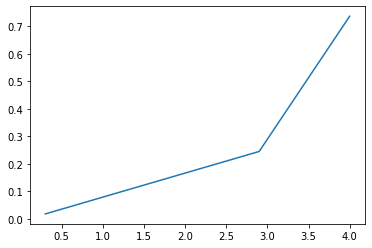

[0.01821127 0.24519181 0.73659691]
1.0


In [43]:
x = np.array([0.3,2.9,4.0])
y = softmax(x)
plt.plot(x,y)
plt.show()

print(y) # [0.01821127 0.24519181 0.73659691]
print(np.sum(y))

손글씨 MNIST 예제

5
(784,)
(28, 28)


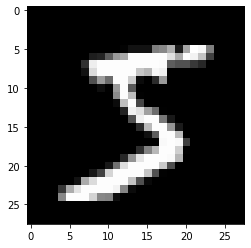

In [45]:
import sys, os
import numpy as np
from mnist import load_mnist
import matplotlib.pylab as plt

# 처음 한 번은 몇 분 걸림
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터 형상 출력
#print(x_train.shape) #(60000,784)
#print(t_train.shape) #(60000,)
#print(x_test.shape) #(10000,784)
#print(t_test.shape) #(10000,)

img = x_train[0]
label = t_train[0]
print(label) #5

print(img.shape) # (784,)
img = img.reshape(28,28) # 원래 이미지 모양으로 변형
print(img.shape) # (28,28)

plt.imshow(img, cmap='gray')

In [0]:
import pickle

def get_data():
  (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
  return x_test, t_test

def init_network():
  with open("/content/drive/My Drive/Colab Notebooks/DeepLearning/03/sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)

  return network

def predict(network, x):
  W1, W2, W3 = network['W1'],network['W2'],network['W3']
  b1, b2, b3 = network['b1'],network['b2'],network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [47]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y) # 확률 가장 높은 원소 index
  if p==t[i]:
    accuracy_cnt += 1
  
print("Accuracy: "+str(float(accuracy_cnt)/len(x)))

Accuracy: 0.9352


내 handwriting 학습시킨 결과

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


RESULT: 5


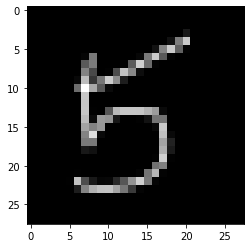

In [48]:
import cv2

network = init_network()

# read image
my_x = cv2.imread("/content/drive/My Drive/Colab Notebooks/DeepLearning/03/my_five.png", cv2.IMREAD_GRAYSCALE)

# resize, flatten
resized_my_x = cv2.resize(my_x, dsize=(28,28), interpolation=cv2.INTER_AREA)
resized_my_x = 1-resized_my_x
plt.imshow(resized_my_x, cmap='gray') # show 28,28 image
resized_my_x = resized_my_x.flatten() # flatten
 
# predict
y = predict(network, resized_my_x)
p = np.argmax(y) # 확률 가장 높은 원소 index
print("RESULT:",(p))

배치 처리

In [54]:
x, t = get_data()
network = init_network()

batch_size = 100 # batch size
accuracy_cnt = 0
for i in range(0,len(x),batch_size):
  x_batch = x[i:i+batch_size]
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis=1) # 확률 가장 높은 원소 index
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy: "+str(float(accuracy_cnt)/len(x)))

Accuracy: 0.9352
